In [1]:
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, RepeatedKFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("breast cancer diagnosis.csv")

In [3]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,NaN
346,898678,B,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083,NaN
438,909231,B,13.85,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.022930,...,28.01,100.90,749.1,0.11180,0.11410,0.04753,0.05890,0.2513,0.06911,NaN
450,9111596,B,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.023860,...,28.18,83.51,507.2,0.09457,0.33990,0.32180,0.08750,0.2305,0.09952,NaN
245,884437,B,10.48,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.030700,...,29.46,73.68,402.8,0.15150,0.10260,0.11810,0.06736,0.2883,0.07748,NaN


In [4]:
df = df.drop(columns=['Unnamed: 32', 'id'])
df.tail(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df.shape

(569, 31)

In [6]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
From the graphs, we can see that **radius_mean**, **perimeter_mean**, **area_mean**, **concavity_mean** and **concave_points_mean** are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

# missing value check

In [10]:
df.isnull().values.any()

False

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Data visualization to create histogram

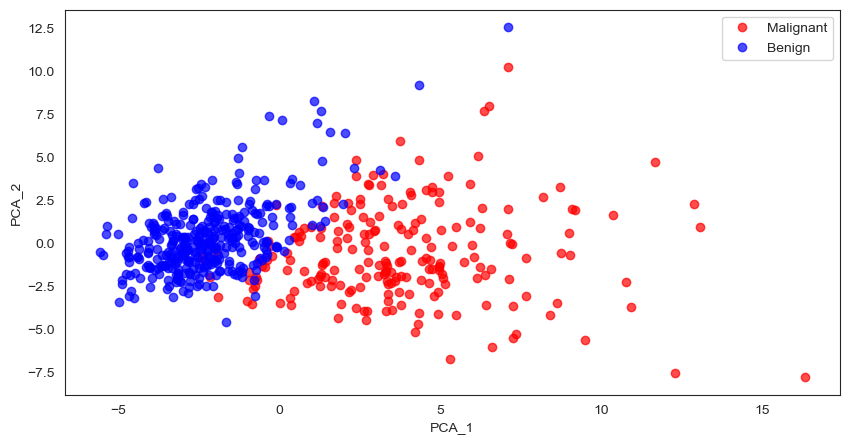

In [12]:
sns.set_style("white")

plt.rcParams['figure.figsize'] = (10,5) 

array = df.values
X = array[:,1:31]
y = array[:,0]
le=LabelEncoder()
y = le.fit_transform(y)


scaler =StandardScaler()
Xs = scaler.fit_transform(X)


pca = PCA(n_components=10)
fit = pca.fit(Xs)

X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.diagnosis == 'M'],PCA_df['PCA_2'][df.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 'B'],PCA_df['PCA_2'][df.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [13]:
#df.hist(bins=50, figsize=(15, 15))
#plt.show()

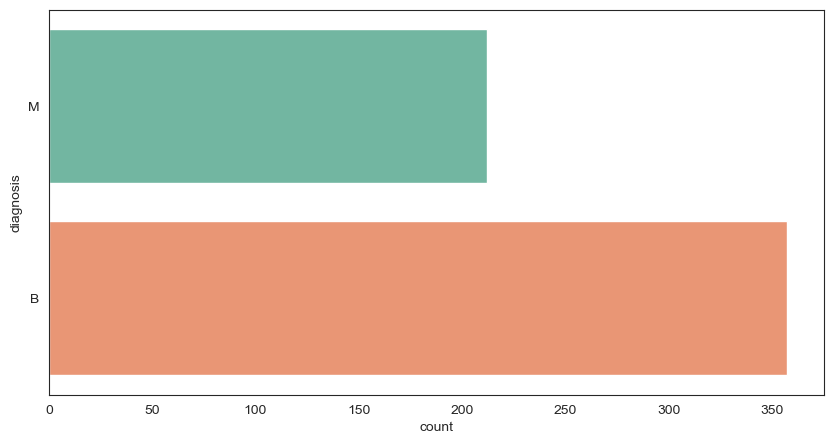

In [14]:
ax = sns.countplot(y='diagnosis', data=df, palette='Set2')

# Finding correlation

diagnosis
B    357
M    212
dtype: int64


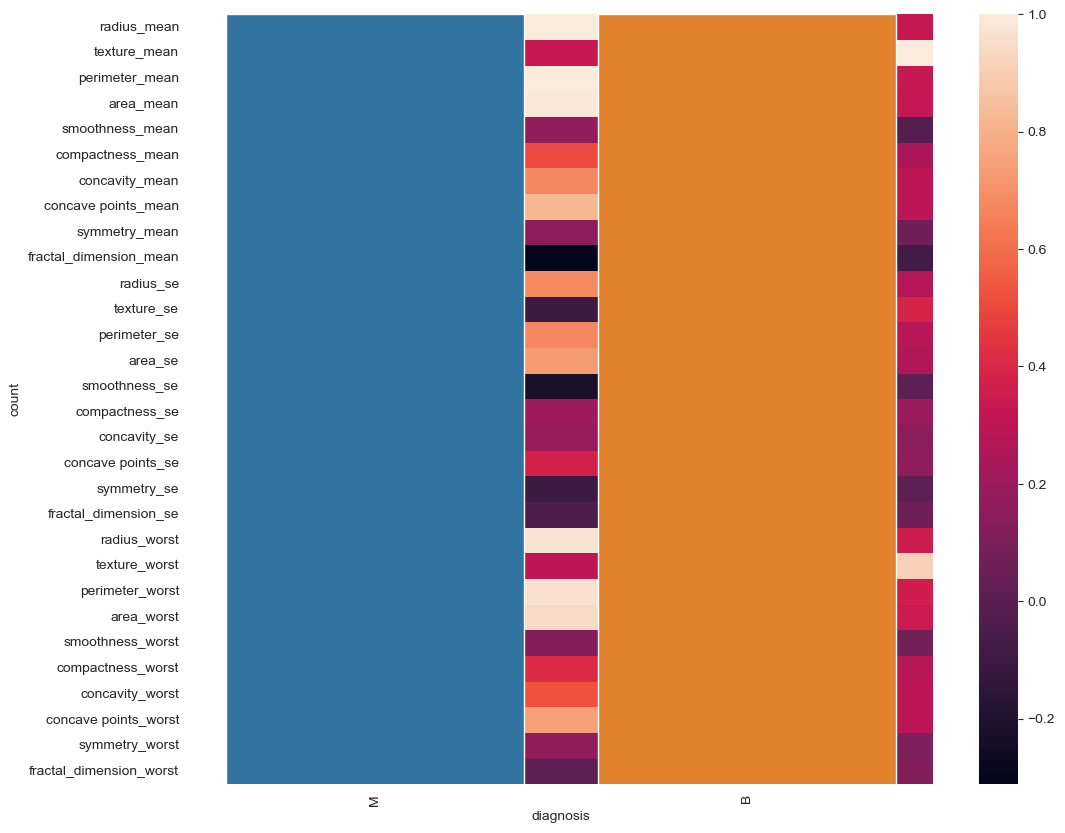

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)

print(df.groupby('diagnosis').size())
sns.countplot(df['diagnosis'],label="Count")
plt.show()

In [16]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Convert the M to 1 and B to 0

In [17]:

label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

# Split the dataset for traning and testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=52, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512,), (57,))

In [19]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,...,11.69,20.74,76.08,411.1,0.1662,0.2031,0.1256,0.09514,0.2780,0.11680
508,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.32,17.76,109.80,928.2,0.1354,0.1361,0.1947,0.13570,0.2300,0.07230
509,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.1732,0.4967,0.5911,0.21630,0.3013,0.10670
510,11.74,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.02639,0.1499,0.06758,...,12.45,17.60,81.25,473.8,0.1073,0.2793,0.2690,0.10560,0.2604,0.09879


In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

## Model

## Training Performance

## Naive bayes

### Confusion matrix

In [21]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_predict = NB_model.predict(X_train)
print(confusion_matrix(y_train, NB_predict))

[[302  12]
 [ 19 179]]


# Accuracy

In [22]:
TP, FP, FN, TN = confusion_matrix(y_train, NB_predict).ravel()
NB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(NB_accuracy*100,"%")


93.9453125 %


# Cross Validation

In [297]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
NB_acc = cross_val_score(NB_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(NB_acc.mean()*100,'%')

93.15987933634993 %


### \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [141]:
TP, FP, FN, TN = confusion_matrix(y_train, NB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9617834394904459
Recall or Sensitivity:  0.940809968847352
Specificity:  0.93717277486911
F1-Score:  0.9511811023622048
False Discovery Rate(FDR):  0.03821656050955414
False Omission Rate(FOR):  0.09595959595959595


## Logistic Regression

### Confusion Matrix

In [23]:
LR_model = LogisticRegression()

LR_model.fit(X_train, y_train)
LR_predict = LR_model.predict(X_train)
print(confusion_matrix(y_train, LR_predict))

[[313   1]
 [  5 193]]


## Accuracy

In [24]:
TP, FP, FN, TN = confusion_matrix(y_train, LR_predict).ravel()
LR_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(LR_accuracy*100,"%")

98.828125 %


## Cross Validation

In [302]:
kfold = RepeatedKFold(n_splits=8, random_state=51)
LR_acc = cross_val_score(LR_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(LR_acc.mean()*100,'%')

97.91015625 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [145]:
TP, FP, FN, TN = confusion_matrix(y_train, LR_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9968152866242038
Recall or Sensitivity:  0.9842767295597484
Specificity:  0.9948453608247423
F1-Score:  0.990506329113924
False Discovery Rate(FDR):  0.0031847133757961785
False Omission Rate(FOR):  0.025252525252525252


# Decision TreeClassifier

## Confusion Matrix

In [25]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

DT_model.fit(X_train, y_train)
DT_predict = DT_model.predict(X_train)
print(confusion_matrix(y_train, DT_predict))

[[313   1]
 [ 16 182]]


## Accuracy

In [26]:
TP, FP, FN, TN = confusion_matrix(y_train, DT_predict).ravel()
DT_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(DT_accuracy*100,"%")

96.6796875 %


## Cross Validation

In [148]:
kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=101)
DT_acc = cross_val_score(DT_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(DT_acc.mean()*100,'%')

93.55987055016183 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [149]:
TP, FP, FN, TN = confusion_matrix(y_train, DT_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9968152866242038
Recall or Sensitivity:  0.9513677811550152
Specificity:  0.994535519125683
F1-Score:  0.973561430793157
False Discovery Rate(FDR):  0.0031847133757961785
False Omission Rate(FOR):  0.08080808080808081


# support vector machines

## Confusion Matrix

In [27]:
SVM_model = SVC(kernel='linear')

SVM_model.fit(X_train, y_train)
SVM_predict = SVM_model.predict(X_train)
print(confusion_matrix(y_train, SVM_predict))

[[313   1]
 [  5 193]]


## Accuracy

In [151]:
TP, FP, FN, TN = confusion_matrix(y_train, SVM_predict).ravel()
SVM_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(SVM_accuracy*100,"%")

98.828125 %


## Cross Validation

In [152]:
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=101)
SVM_acc = cross_val_score(SVM_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(SVM_acc.mean()*100,'%')

97.8515625 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [153]:
TP, FP, FN, TN = confusion_matrix(y_train, SVM_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9968152866242038
Recall or Sensitivity:  0.9842767295597484
Specificity:  0.9948453608247423
F1-Score:  0.990506329113924
False Discovery Rate(FDR):  0.0031847133757961785
False Omission Rate(FOR):  0.025252525252525252


# Linear Discriminant Analysis

## Confusion Matrix

In [28]:
LDA_model = LinearDiscriminantAnalysis()

LDA_model.fit(X_train, y_train)
LDA_predict = LDA_model.predict(X_train)
print(confusion_matrix(y_train, LDA_predict))

[[313   1]
 [ 16 182]]


## Accuracy

In [29]:
TP, FP, FN, TN = confusion_matrix(y_train, LDA_predict).ravel()
LDA_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(LDA_accuracy*100,"%")

96.6796875 %


## Cross Validation

In [156]:
kfold = KFold(n_splits=6, shuffle=True, random_state=101)
LDA_acc = cross_val_score(LDA_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(LDA_acc.mean()*100,'%')

96.49110807113543 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [157]:
TP, FP, FN, TN = confusion_matrix(y_train, LDA_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9968152866242038
Recall or Sensitivity:  0.9513677811550152
Specificity:  0.994535519125683
F1-Score:  0.973561430793157
False Discovery Rate(FDR):  0.0031847133757961785
False Omission Rate(FOR):  0.08080808080808081


# KNeighborsClassifier

## Confusion Matrix

In [38]:
KN_model = KNeighborsClassifier(n_neighbors=3)

KN_model.fit(X_train, y_train)
KN_predict = KN_model.predict(X_train)
print(confusion_matrix(y_train, KN_predict))

[[313   1]
 [ 10 188]]


## Accuracy

In [39]:
TP, FP, FN, TN = confusion_matrix(y_train, KN_predict).ravel()
KN_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(KN_accuracy*100,"%")

97.8515625 %


## Cross Validation

In [161]:
kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=51)
KN_acc = cross_val_score(KN_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(KN_acc.mean()*100,'%')

96.67999238530363 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [44]:
TP, FP, FN, TN = confusion_matrix(y_train, KN_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9968152866242038
Recall or Sensitivity:  0.9690402476780186
Specificity:  0.9947089947089947
F1-Score:  0.9827315541601256
False Discovery Rate(FDR):  0.0031847133757961785
False Omission Rate(FOR):  0.050505050505050504


# AdaBoost Classifier

## Confussion Matrix

In [40]:
AB_model = AdaBoostClassifier()

AB_model.fit(X_train, y_train)
AB_predict = AB_model.predict(X_train)
print(confusion_matrix(y_train, AB_predict))

[[314   0]
 [  0 198]]


## Accuracy

In [41]:
TP, FP, FN, TN = confusion_matrix(y_train, AB_predict).ravel()
AB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(AB_accuracy*100,"%")

100.0 %


## Cross Validation

In [47]:
kfold = KFold(n_splits=5, shuffle=True, random_state=101)
AB_acc = cross_val_score(AB_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(AB_acc.mean()*100,'%')

96.28973919664953 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [48]:
TP, FP, FN, TN = confusion_matrix(y_train, AB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Random Forest Classifier

## Confussion Matrix

In [42]:
RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)
RF_predict = RF_model.predict(X_train)
print(confusion_matrix(y_train, RF_predict))

[[314   0]
 [  0 198]]


## Accuracy

In [43]:
TP, FP, FN, TN = confusion_matrix(y_train, RF_predict).ravel()
RF_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(RF_accuracy*100,"%")

100.0 %


## Cross Validation

In [51]:
kfold = RepeatedKFold(n_splits=10, random_state=101)
RF_acc = cross_val_score(RF_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(RF_acc.mean()*100,'%')

96.03355957767724 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [52]:
TP, FP, FN, TN = confusion_matrix(y_train, RF_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Voting Classifier

## Confussion Matrix

In [44]:
VC_model = VotingClassifier(estimators=[('ab',AdaBoostClassifier()),('lr',LogisticRegression()),
                                        ('rf',RandomForestClassifier()),('svm',SVC())],voting='hard')

VC_model.fit(X_train, y_train)
VC_predict = VC_model.predict(X_train)
print(confusion_matrix(y_train, VC_predict))

[[314   0]
 [  5 193]]


## Accuracy

In [45]:
TP, FP, FN, TN = confusion_matrix(y_train, VC_predict).ravel()
VC_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(VC_accuracy*100,"%")


99.0234375 %


## Cross Validation

In [46]:
kfold = RepeatedStratifiedKFold(n_splits=10, random_state=101)
VC_acc = cross_val_score(VC_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(VC_acc.mean()*100,'%')

KeyboardInterrupt: 

## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [ ]:
TP, FP, FN, TN = confusion_matrix(y_train, VC_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

# Stochastic Gradient Descent

## Confussion Matrix

In [47]:
SGD_model = SGDClassifier(max_iter=500, random_state=51)

SGD_model.fit(X_train, y_train)
SGD_predict = SGD_model.predict(X_train)
print(confusion_matrix(y_train, SGD_predict))

[[312   2]
 [  3 195]]


## Accuracy

In [48]:
TP, FP, FN, TN = confusion_matrix(y_train, SGD_predict).ravel()
SGD_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(SGD_accuracy*100,"%")

99.0234375 %


## Cross Validation

In [59]:
kfold = StratifiedKFold(n_splits=10,shuffle=True,  random_state=51)
SGD_acc = cross_val_score(SGD_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(SGD_acc.mean()*100,'%')

96.8815987933635 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [60]:
TP, FP, FN, TN = confusion_matrix(y_train, SGD_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9936305732484076
Recall or Sensitivity:  0.9904761904761905
Specificity:  0.9898477157360406
F1-Score:  0.9920508744038156
False Discovery Rate(FDR):  0.006369426751592357
False Omission Rate(FOR):  0.015151515151515152


# Bagging Classifier

## Confussion Matrix

In [49]:
BC_model = BaggingClassifier(base_estimator = RandomForestClassifier(), n_estimators = 100) # our contribution is base_estimator

BC_model.fit(X_train, y_train)
BC_predict = BC_model.predict(X_train)
print(confusion_matrix(y_train, BC_predict))

[[314   0]
 [  3 195]]


## Accuracy

In [50]:

TP, FP, FN, TN = confusion_matrix(y_train, BC_predict).ravel()
BC_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(BC_accuracy*100,"%")

99.4140625 %


## Cross Validation

In [63]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
cvv = RepeatedKFold(n_splits=10,  random_state=101)
BC_acc = cross_val_score(BC_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(BC_acc.mean()*100,'%')

95.50904977375566 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [64]:
TP, FP, FN, TN = confusion_matrix(y_train, BC_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  0.9905362776025236
Specificity:  1.0
F1-Score:  0.9952456418383517
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.015151515151515152


# Gradient Boosting Classifier

## Confussion Matrix

In [51]:
GB_model = GradientBoostingClassifier()

GB_model.fit(X_train, y_train)
GB_predict = GB_model.predict(X_train)
print(confusion_matrix(y_train, GB_predict))

[[314   0]
 [  0 198]]


# Accuracy

In [52]:
TP, FP, FN, TN = confusion_matrix(y_train, GB_predict).ravel()
GB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(GB_accuracy*100,"%")


100.0 %


## Cross Validation

In [67]:
kfold = KFold(n_splits=10, shuffle=True, random_state=51)
GB_acc = cross_val_score(GB_model, X_train, y_train, cv=kfold, scoring='accuracy')
print(GB_acc.mean()*100,'%')

96.28959276018098 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [68]:
TP, FP, FN, TN = confusion_matrix(y_train, GB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.0


# Testing Performance
## Naive bayes

# Confusion Matrix

In [53]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_predict = NB_model.predict(X_test)
print(confusion_matrix(y_test, NB_predict))

[[41  2]
 [ 0 14]]


# Accuracy

In [54]:
TP, FP, FN, TN = confusion_matrix(y_test, NB_predict).ravel()
NB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(NB_accuracy*100,"%")

96.49122807017544 %


# Cross Validation

In [55]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
cvv = RepeatedStratifiedKFold(n_splits=10, random_state=101)
NB_acc = cross_val_score(NB_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(NB_acc.mean()*100,'%')

95.0 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [72]:
TP, FP, FN, TN = confusion_matrix(y_test, NB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9534883720930233
Recall or Sensitivity:  1.0
Specificity:  0.875
F1-Score:  0.9761904761904763
False Discovery Rate(FDR):  0.046511627906976744
False Omission Rate(FOR):  0.0


# Logistic Regression

## Confusion Matrix

In [56]:
LR_model = LogisticRegression()

LR_model.fit(X_train, y_train)
LR_predict = LR_model.predict(X_test)
print(confusion_matrix(y_test, LR_predict))

[[40  3]
 [ 0 14]]


## Accuracy

In [57]:
TP, FP, FN, TN = confusion_matrix(y_test, LR_predict).ravel()
LR_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(LR_accuracy*100,"%")

94.73684210526315 %


## Cross Validation

In [243]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
LR_acc = cross_val_score(LR_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(LR_acc.mean()*100,'%')

96.66666666666669 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [76]:
TP, FP, FN, TN = confusion_matrix(y_test, LR_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9302325581395349
Recall or Sensitivity:  1.0
Specificity:  0.8235294117647058
F1-Score:  0.963855421686747
False Discovery Rate(FDR):  0.06976744186046512
False Omission Rate(FOR):  0.0


# Decision TreeClassifier

## Confusion Matrix

In [58]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

DT_model.fit(X_train, y_train)
DT_predict = DT_model.predict(X_test)
print(confusion_matrix(y_test, DT_predict))

[[38  5]
 [ 0 14]]


## Accuracy

In [59]:
TP, FP, FN, TN = confusion_matrix(y_test, DT_predict).ravel()
DT_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(DT_accuracy*100,"%")

91.22807017543859 %


## Cross Validation

In [60]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
DT_acc = cross_val_score(DT_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(DT_acc.mean()*100,'%')

91.66666666666666 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [61]:
TP, FP, FN, TN = confusion_matrix(y_test, DT_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.8837209302325582
Recall or Sensitivity:  1.0
Specificity:  0.7368421052631579
F1-Score:  0.9382716049382717
False Discovery Rate(FDR):  0.11627906976744186
False Omission Rate(FOR):  0.0


# support vector machines

## Confusion Matrix

In [62]:
SVM_model = SVC(kernel='poly')

SVM_model.fit(X_train, y_train)
SVM_predict = SVM_model.predict(X_test)
print(confusion_matrix(y_test, SVM_predict))

[[43  0]
 [ 2 12]]


## Accuracy

In [63]:
TP, FP, FN, TN = confusion_matrix(y_test, SVM_predict).ravel()
SVM_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(SVM_accuracy*100,"%")

96.49122807017544 %


## Cross Validation

In [290]:
SVM_model = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
cvv = RepeatedStratifiedKFold(n_splits=10,  random_state=101)
SVM_acc = cross_val_score(SVM_model, X_test, y_test, cv=cvv, scoring='accuracy')
print(SVM_acc.mean()*100,'%')

93.06666666666666 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [286]:
TP, FP, FN, TN = confusion_matrix(y_test, SVM_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  1.0
Recall or Sensitivity:  0.9555555555555556
Specificity:  1.0
F1-Score:  0.9772727272727273
False Discovery Rate(FDR):  0.0
False Omission Rate(FOR):  0.14285714285714285


# Linear Discriminant Analysis

## Confusion Matrix

In [64]:
LDA_model = LinearDiscriminantAnalysis()

LDA_model.fit(X_train, y_train)
LDA_predict = LDA_model.predict(X_test)
print(confusion_matrix(y_test, LDA_predict))

[[41  2]
 [ 2 12]]


## Accuracy

In [65]:
TP, FP, FN, TN = confusion_matrix(y_test, LDA_predict).ravel()
LDA_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(LDA_accuracy*100,"%")

92.98245614035088 %


## Cross Validation

In [87]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
LDA_acc = cross_val_score(LDA_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(LDA_acc.mean()*100,'%')

90.0 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [66]:
TP, FP, FN, TN = confusion_matrix(y_test, LDA_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9534883720930233
Recall or Sensitivity:  0.9534883720930233
Specificity:  0.8571428571428571
F1-Score:  0.9534883720930233
False Discovery Rate(FDR):  0.046511627906976744
False Omission Rate(FOR):  0.14285714285714285


# KNeighborsClassifier

## Confusion Matrix

In [67]:
KN_model = KNeighborsClassifier(n_neighbors=4)

KN_model.fit(X_train, y_train)
KN_predict = KN_model.predict(X_test)
print(confusion_matrix(y_test, KN_predict))

[[42  1]
 [ 1 13]]


## Accuracy

In [68]:
TP, FP, FN, TN = confusion_matrix(y_test, KN_predict).ravel()
KN_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(KN_accuracy*100,"%")

96.49122807017544 %


## Cross Validation

In [69]:
kfold = RepeatedStratifiedKFold(n_splits=10,  random_state=101)
KN_acc = cross_val_score(KN_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(KN_acc.mean()*100,'%')

93.06666666666666 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [92]:
TP, FP, FN, TN = confusion_matrix(y_test, KN_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9767441860465116
Recall or Sensitivity:  0.9767441860465116
Specificity:  0.9285714285714286
F1-Score:  0.9767441860465116
False Discovery Rate(FDR):  0.023255813953488372
False Omission Rate(FOR):  0.07142857142857142


# AdaBoost Classifier

## Confussion Matrix

In [70]:
AB_model = AdaBoostClassifier(base_estimator=RandomForestClassifier())

AB_model.fit(X_train, y_train)
AB_predict = AB_model.predict(X_test)
print(confusion_matrix(y_test, AB_predict))

[[40  3]
 [ 0 14]]


## Accuracy

In [71]:
TP, FP, FN, TN = confusion_matrix(y_test, AB_predict).ravel()
AB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(AB_accuracy*100,"%")

94.73684210526315 %


## Cross Validation

In [164]:
kfold = RepeatedStratifiedKFold(n_splits=7,  random_state=101)
AB_acc = cross_val_score(AB_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(AB_acc.mean()*100,'%')

94.92063492063491 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [96]:
TP, FP, FN, TN = confusion_matrix(y_test, AB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.8837209302325582
Recall or Sensitivity:  1.0
Specificity:  0.7368421052631579
F1-Score:  0.9382716049382717
False Discovery Rate(FDR):  0.11627906976744186
False Omission Rate(FOR):  0.0


# Random Forest Classifier

## Confussion Matrix

In [72]:
RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)
RF_predict = RF_model.predict(X_test)
print(confusion_matrix(y_test, RF_predict))

[[40  3]
 [ 0 14]]


## Accuracy

In [73]:
TP, FP, FN, TN = confusion_matrix(y_test, RF_predict).ravel()
RF_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(RF_accuracy*100,"%")

94.73684210526315 %


## Cross Validation

In [99]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
RF_acc = cross_val_score(RF_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(RF_acc.mean()*100,'%')

96.66666666666669 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [100]:
TP, FP, FN, TN = confusion_matrix(y_test, RF_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)

print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9534883720930233
Recall or Sensitivity:  1.0
Specificity:  0.875
F1-Score:  0.9761904761904763
False Discovery Rate(FDR):  0.046511627906976744
False Omission Rate(FOR):  0.0


# Voting Classifier

## Confussion Matrix

In [74]:
VC_model = VotingClassifier(estimators=[('ab',AdaBoostClassifier()),('lr',LogisticRegression()),
                                        ('rf',RandomForestClassifier()),('svm',SVC())],voting='hard')

VC_model.fit(X_train, y_train)
VC_predict = VC_model.predict(X_test)
print(confusion_matrix(y_test, VC_predict))

[[40  3]
 [ 0 14]]


## Accuracy

In [75]:
TP, FP, FN, TN = confusion_matrix(y_test, VC_predict).ravel()
VC_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(VC_accuracy*100,"%")

94.73684210526315 %


## Cross Validation

In [103]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
VC_acc = cross_val_score(VC_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(VC_acc.mean()*100,'%')

94.66666666666667 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [104]:
TP, FP, FN, TN = confusion_matrix(y_test, VC_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9302325581395349
Recall or Sensitivity:  1.0
Specificity:  0.8235294117647058
F1-Score:  0.963855421686747
False Discovery Rate(FDR):  0.06976744186046512
False Omission Rate(FOR):  0.0


# Stochastic Gradient Descent

## Confussion Matrix

In [88]:
SGD_model = SGDClassifier(max_iter=500, random_state=51)

SGD_model.fit(X_train, y_train)
SGD_predict = SGD_model.predict(X_test)
print(confusion_matrix(y_test, SGD_predict))

[[36  7]
 [ 0 14]]


## Accuracy

In [89]:
TP, FP, FN, TN = confusion_matrix(y_test, SGD_predict).ravel()
SGD_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(SGD_accuracy*100,"%")

87.71929824561403 %


## Cross Validation

In [90]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
SGD_acc = cross_val_score(SGD_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(SGD_acc.mean()*100,'%')

98.33333333333334 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [249]:
TP, FP, FN, TN = confusion_matrix(y_test, SGD_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.8372093023255814
Recall or Sensitivity:  1.0
Specificity:  0.6666666666666666
F1-Score:  0.9113924050632911
False Discovery Rate(FDR):  0.16279069767441862
False Omission Rate(FOR):  0.0


# Bagging Classifier

## Confussion Matrix

In [91]:
BC_model = BaggingClassifier(base_estimator = RandomForestClassifier(), n_estimators = 100) #our contribution

BC_model.fit(X_train, y_train)
BC_predict = BC_model.predict(X_test)
print(confusion_matrix(y_test, BC_predict))

[[40  3]
 [ 0 14]]


## Accuracy

In [251]:
TP, FP, FN, TN = confusion_matrix(y_test, BC_predict).ravel()
BC_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(BC_accuracy*100,"%")

94.73684210526315 %


## Cross Validation

In [253]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
cvv = RepeatedStratifiedKFold(n_splits=10,  random_state=101)
BC_acc = cross_val_score(BC_model, X_test, y_test, cv=cvv, scoring='accuracy')
print(BC_acc.mean()*100,'%')

94.43333333333334 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [112]:
TP, FP, FN, TN = confusion_matrix(y_test, BC_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9302325581395349
Recall or Sensitivity:  1.0
Specificity:  0.8235294117647058
F1-Score:  0.963855421686747
False Discovery Rate(FDR):  0.06976744186046512
False Omission Rate(FOR):  0.0


# Gradient Boosting Classifier

## Confussion Matrix

In [113]:
GB_model = GradientBoostingClassifier()

GB_model.fit(X_train, y_train)
GB_predict = GB_model.predict(X_test)
print(confusion_matrix(y_test, GB_predict))

[[40  3]
 [ 0 14]]


## Accuracy

In [114]:
TP, FP, FN, TN = confusion_matrix(y_test, GB_predict).ravel()
GB_accuracy = (TP + TN) / (TP + FP + FN + TN)
print(GB_accuracy*100,"%")

94.73684210526315 %


## Cross Validation

In [115]:
kfold = KFold(n_splits=10, shuffle=True, random_state=101)
GB_acc = cross_val_score(GB_model, X_test, y_test, cv=kfold, scoring='accuracy')
print(GB_acc.mean()*100,'%')

91.66666666666666 %


## \# Precision # Recall or Sensitivity # Specificity # F1-Score # False Discovery Rate(FDR) # False Omission Rate(FOR)

In [116]:
TP, FP, FN, TN = confusion_matrix(y_test, GB_predict).ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_Score = ((2*precision*recall) / (precision + recall))
FDR = FP / (FP + TP)
FOR = FN / (FN + TN)
    
print("Precision: ", precision)
print("Recall or Sensitivity: ", recall)
print("Specificity: ", specificity)
print("F1-Score: ", F1_Score)
print("False Discovery Rate(FDR): ", FDR)
print("False Omission Rate(FOR): ", FOR)

Precision:  0.9302325581395349
Recall or Sensitivity:  1.0
Specificity:  0.8235294117647058
F1-Score:  0.963855421686747
False Discovery Rate(FDR):  0.06976744186046512
False Omission Rate(FOR):  0.0
